In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df = pd.read_csv(r"D:\excelr assignments\text mining\Elon_musk.csv",encoding='Latin-1')

In [3]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [6]:
df.Text

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [7]:
df['Text'].duplicated().sum()

2

In [8]:
df.drop_duplicates(subset='Text',inplace=True)

In [9]:
#text preprocessing

In [10]:
#removing @mentions,#,RT,hyperlink

In [11]:
import regex as re

In [12]:
def remove(text):
    text = text.lower()
    text = re.sub(r'@[\w]*','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]','',text)
    text= re.sub(r'https?:\/\/\S+','',text)
    return text

In [13]:
df['clean_text'] = df['Text'].apply(remove)

In [14]:
df.head(10)

,Text,clean_text
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...
2,@joerogan @Spotify Great interview!,great interview!
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox!
6,"Frodo was the underdoge,\nAll thought he would...","frodo was the underdoge,\nall thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed! tweets definitely do not represent r...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [15]:
#removing punctuations,special chareccters,numbers

In [16]:
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z]"," ",regex=True)

In [17]:
df

,Text,clean_text
0,@kunalb11 Im an alien,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next lev...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative ...
1995,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions b...
1996,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is u f u f...


In [18]:
#remove short words

In [19]:
df['clean_text'] = df['clean_text'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
df.head()

,Text,clean_text
0,@kunalb11 Im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk with next level have tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...


In [20]:
#function to remove emojis

In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [22]:
df['clean_text'] = df['clean_text'].apply(lambda x:remove_emoji(x))

In [23]:
df.head()

,Text,clean_text
0,@kunalb11 Im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk with next level have tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...


In [24]:
#removing stopwords

In [25]:
sw = []
stop = open(r"D:\excelr assignments\text mining\stop.txt",'r')
for i in stop:
    sw.append(i.strip())

In [26]:
sw

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [27]:
df['clean_text'] = df['clean_text'].apply(lambda x:' '.join([word for word in x.split() if word not in sw]))

In [28]:
df.head(15)

,Text,clean_text
0,@kunalb11 Im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk level
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy year
6,"Frodo was the underdoge,\nAll thought he would...",frodo underdoge thought fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,tweets represent real world time allocation
9,The most entertaining outcome is the most likely,entertaining outcome


In [29]:
#we have some empty values afer cleaning the text.

In [30]:
df['clean_text'].replace('',np.NaN,inplace=True)

In [31]:
df['clean_text'].isnull().sum()

337

In [32]:
#dropping the mepty values

In [33]:
df.dropna(inplace=True)

In [34]:
df.reset_index(inplace=True)

In [35]:
#TOKENIZATION AND LEMMATIZATION

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')

In [37]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
df['clean_text'] = df['clean_text'].apply(lemmatize_words)

In [38]:
#wordcloud

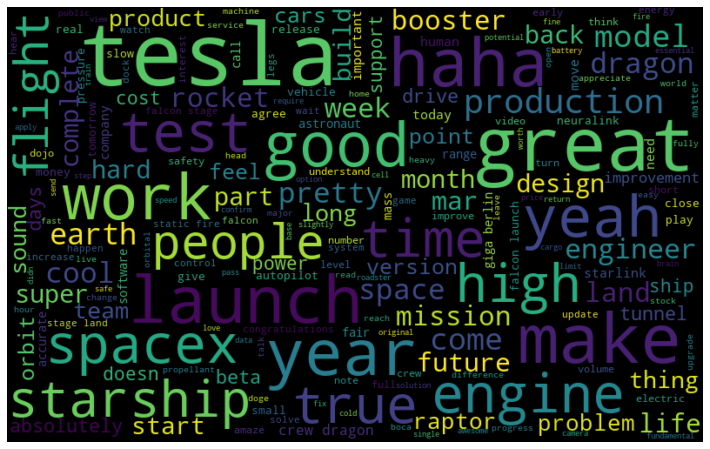

In [39]:
all_words = " ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [41]:
#subjectivity and polarity

In [45]:
from textblob import TextBlob

In [46]:
def getsub(text):
    return TextBlob(text).sentiment.subjectivity
def getpol(text):
    return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['clean_text'].apply(getsub)
df['polarity'] = df['clean_text'].apply(getpol)
df.head()

,index,Text,clean_text,subjectivity,polarity
0,0,@kunalb11 Im an alien,alien,0.75,-0.25
1,1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,trace cyberpunk level,0.00,0.00
2,2,@joerogan @Spotify Great interview!,great interview,0.75,0.80
3,3,@gtera27 Doge is underestimated,doge underestimate,0.00,0.00
4,4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amaze execution year,0.00,0.00


In [47]:
#sentiment

In [49]:
def getsentiment(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['sentiment'] = df['polarity'].apply(getsentiment)
df.head()

,index,Text,clean_text,subjectivity,polarity,sentiment
0,0,@kunalb11 Im an alien,alien,0.75,-0.25,Negative
1,1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,trace cyberpunk level,0.00,0.00,Neutral
2,2,@joerogan @Spotify Great interview!,great interview,0.75,0.80,Positive
3,3,@gtera27 Doge is underestimated,doge underestimate,0.00,0.00,Neutral
4,4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amaze execution year,0.00,0.00,Neutral


In [51]:
#positive text

In [56]:
df['clean_text'].loc[df['sentiment']=='Positive']

2                                         great interview
5                                              happy year
7                                                    haha
8              tweet represent real world time allocation
11                                                   real
                              ...                        
1648                                                 true
1650                                      term full stack
1651                            great terrify sense think
1653    easy answer tweet help dire brain injuries pri...
1655    true sound surreal negative propaganda easy fi...
Name: clean_text, Length: 583, dtype: object

In [57]:
#negative text

In [58]:
df['clean_text'].loc[df['sentiment']=='Negative']

0                                                   alien
6                              frodo underdoge think fail
19      nasa select falcon heavy launch elements lunar...
21      starlink staggeringly difficult technical econ...
22         spacex pass deep chasm negative cash flow year
                              ...                        
1612    thing call money slow lossy unsecure database ...
1619    strength perseverance people tesla face extrem...
1624    reusability essential rocket single absurd sin...
1631      reduce price model dual motor offer single moto
1658                                    altho dumb dumber
Name: clean_text, Length: 180, dtype: object

In [59]:
#neutral text

In [60]:
df['clean_text'].loc[df['sentiment']=='Neutral']

1                                  trace cyberpunk level
3                                     doge underestimate
4       congratulations tesla china amaze execution year
9                                      entertain outcome
10                                       agree clubhouse
                              ...                       
1652                     payout vest stock options stock
1654                                      symbiosis wait
1656               make read term condition click accept
1657                                      samwise gamgee
1659                              progress update august
Name: clean_text, Length: 897, dtype: object

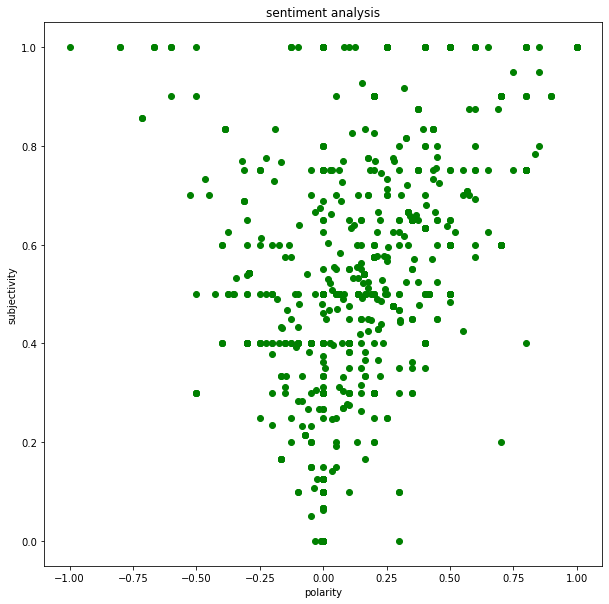

In [62]:
plt.figure(figsize=(10,10))
for i in range(0,len(df)):
    plt.scatter(df['polarity'][i],df['subjectivity'][i],color='green')
plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [63]:
# percentage of positive text

In [69]:
sum(df['sentiment']=='Positive')/len(df)

0.35120481927710845

In [ ]:
# percentage of negative text

In [71]:
sum(df['sentiment']=='Negative')/len(df)

0.10843373493975904

In [ ]:
# percentage of neutral text

In [70]:
sum(df['sentiment']=='Neutral')/len(df)

0.5403614457831325

In [74]:
df['sentiment'].value_counts()/len(df)

Neutral     0.540361
Positive    0.351205
Negative    0.108434
Name: sentiment, dtype: float64

In [75]:
#More than half of the text contains nutral snetiment

<AxesSubplot:>

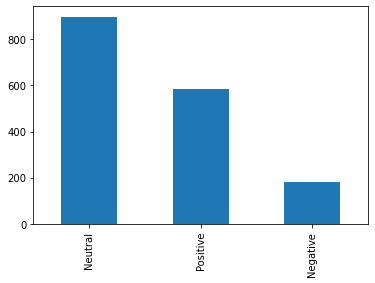

In [77]:
df['sentiment'].value_counts().plot(kind='bar')